# Week 5
 -  Quantum information with multipartite systems <a class="tocSkip">
    (c) Ariel Guerreiro 2023

In this notebook, we will explore the nature of bipartite quantum systems and how they can become entangled, creating the famous Bell states. We will discuss the properties of entanglement and the role it plays in quantum information processing. Additionally, we will examine how noise and decoherence can disrupt the entanglement of a system, leading to the breakdown of quantum correlations.

Finally, we will introduce the Bell inequalities, which are a set of mathematical conditions that provide a way to test whether a system is truly entangled or not. These inequalities have important implications for our understanding of quantum mechanics and have been the subject of intense study for decades.

Throughout this notebook, we will use interactive examples and exercises to help you gain a deeper understanding of these complex topics.

# Before we start... <a class="tocSkip">

  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [ ]:
!pip install qiskit==0.43

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random
import re  # regular expressions module

from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import *

from qiskit import *
from qiskit.visualization import *
from qiskit.tools import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Noise and decoherence




In the realm of quantum computing, the pursuit of harnessing quantum phenomena for computational tasks necessitates grappling with the intricate challenge of quantum noise. Quantum noise encompasses unwanted external influences capable of disturbing the delicate quantum state, leading to errors or inaccuracies in measurements. These disturbances can arise from various sources, including thermal noise and electrical noise, emanating from the stochastic motion of atoms and molecules in the environment, as well as fluctuations in electromagnetic fields, respectively.

One significant manifestation of quantum noise is decoherence, which denotes the loss of quantum coherence in a quantum system due to its interaction with its environment. In the quantum realm, the evolution of a quantum state is governed by unitary transformations. However, when a quantum system becomes entangled with its environment, this evolution deviates from unitarity, becoming non-unitary and irreversible. Consequently, quantum coherence diminishes, leading the quantum system to exhibit classical-like behavior.

Decoherence poses profound implications for various properties of quantum systems, notably affecting quantum superposition and entanglement. Quantum superposition, a fundamental principle allowing quantum bits (qubits) to exist in multiple states simultaneously, is susceptible to disruption by decoherence. As a quantum system loses coherence, the distinct quantum states composing the superposition collapse into classical states, eroding the system's quantum advantage.

Entanglement, another hallmark phenomenon in quantum mechanics, wherein quantum states of particles become interconnected irrespective of distance, also succumbs to the adverse effects of decoherence. The fragile entanglement between qubits, essential for enabling powerful quantum algorithms, deteriorates in the presence of decoherence, diminishing the system's computational capabilities.

It is crucial to distinguish between quantum decoherence and dissipation. While decoherence refers to the loss of coherence resulting from the interaction with the environment, dissipation pertains to the irreversible loss of energy from the system, leading to a decrease in its amplitude. Decoherence predominantly affects the coherence and superposition properties of the system, whereas dissipation primarily impacts the system's energy dynamics.

In Qiskit, the emulation of decoherence and other noise phenomena is imperative for studying their effects on quantum algorithms and devising strategies to mitigate them. Decoherence is commonly modeled using a noise model comprising a set of quantum errors, including gate errors, measurement errors, and initialization errors. These errors are incorporated into simulations to evaluate the impact of noise on quantum algorithms and assess the efficacy of error mitigation techniques.

One prevalent type of noise modeled in Qiskit is the bit flip error, wherein a qubit spontaneously transitions between the 0 and 1 states. This error is simulated by introducing a stochastic error to the ideal unitary gate, resulting in a probabilistic mixture of the ideal gate and the identity gate. Such noise models, often represented using Kraus operators, facilitate the simulation of noise effects on quantum circuits, enabling researchers to refine algorithms and enhance their resilience against noise-induced errors.

In the context of quantum computing, the bit flip noise model represents one of the fundamental types of noise that can afflict qubits. This noise model is particularly significant because it captures the spontaneous flipping of a qubit's state from $|0\rangle$ to $|1\rangle$ or vice versa. To describe this noise model using Kraus operators, let's denote the ideal operation on a qubit as $U$, which preserves the qubit's state without any noise. The effect of the bit flip noise can then be represented by a set of Kraus operators, typically denoted as $\{E_0, E_1\}$, where:

$$
\begin{align*}
E_0 &= \sqrt{1 - p} I \\
E_1 &= \sqrt{p} X
\end{align*}
$$

Here, $I$ represents the identity operator, and $X$ represents the Pauli-X gate, which flips the qubit's state from $|0\rangle$ to $|1\rangle$ or vice versa. The parameter $p$ denotes the probability of the bit flip error occurring.

The Kraus operators $E_0$ and $E_1$ describe the action of the noise on the qubit. When the qubit is in the $|0\rangle$ state, the Kraus operator $E_0$ leaves the qubit's state unchanged with probability $1 - p$, representing the absence of noise. However, with probability $p$, the Kraus operator $E_1$ applies the Pauli-X gate, flipping the qubit's state to $|1\rangle$, thereby introducing the bit flip error.

Similarly, when the qubit is in the $|1\rangle$ state, the Kraus operator $E_0$ again leaves the qubit's state unchanged with probability $1 - p$. However, with probability $p$, the Kraus operator $E_1$ applies the Pauli-X gate, flipping the qubit's state back to $|0\rangle$.

Thus, the action of the bit flip noise model described by the Kraus operators $\{E_0, E_1\}$ captures the probabilistic nature of the error, allowing for its incorporation into quantum circuits for simulation and error analysis.


Let us provide a simple example of bit flip error:

In [ ]:
from qiskit.providers.aer import AerSimulator

# Qiskit Aer noise module imports
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

# System Specification
n_qubits = 2
circuit8 = QuantumCircuit(n_qubits, n_qubits)

# Test Circuit
circuit8.h(0)
for qubit in range(n_qubits - 1):
    circuit8.cx(qubit, qubit + 1)

circuit8.barrier()
circuit8.measure(range(n_qubits), range(n_qubits))

# Simulator
simulator = AerSimulator()

circuit8.draw()


┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

<div class="alert alert-block alert-info">
<b>Question 1:</b> Can you tell which state is generated by this circuit? Is this a relevant state? Why?
</div>

To facilitate comparison, we start by simulating the outcome in the absence of noise.

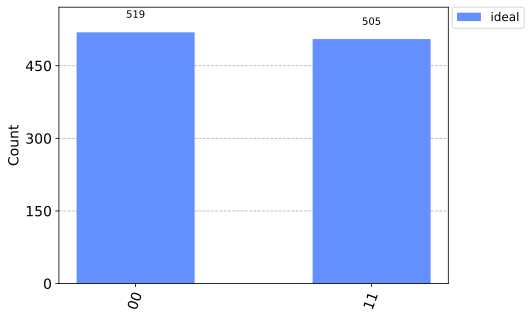

In [ ]:
# Ideal execution
job = execute(circuit8, simulator)
result_ideal = job.result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal, legend = ["ideal"])

An then add some noise model emulating the presence of bit-flip errors in a quantum computer. The noise model is defined by three error probabilities: p_reset, p_meas, and p_gate1.

* p_reset is the probability that a qubit is reset to the $|0⟩$ state before a quantum operation is applied to it.
* p_meas is the probability that a bit-flip error occurs during a measurement, leading to an incorrect measurement outcome.
* p_gate1 is the probability that a bit-flip error occurs during a single-qubit gate operation.

Using these error probabilities, QuantumError objects are defined to represent the bit-flip errors that can occur during the three different types of operations: reset, measurement, and single-qubit gates. These error objects are then added to a NoiseModel object, which represents the complete noise model for a quantum computer with bit-flip errors.



The add_all_qubit_quantum_error() method is used to add the error objects to the noise model for all qubits and all gates of the specified types. Finally, the print() method is used to print a summary of the noise model.

In [ ]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u1', 'cx', 'measure', 'u2', 'reset']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


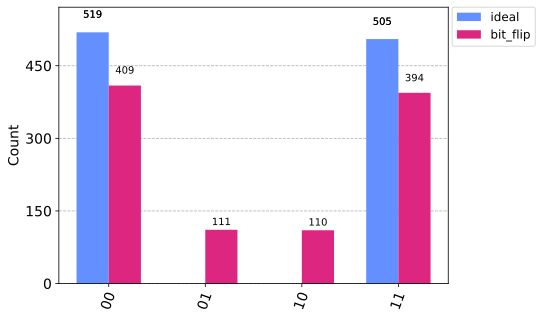

In [ ]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip], legend = ["ideal","bit_flip"])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b> This code demonstrates how to simulate the effect of noise on a quantum circuit using Qiskit's AerSimulator and NoiseModel classes.
The first part of the code imports the necessary modules and defines the system specification, which in this case is a quantum circuit with two qubits. The circuit applies a Hadamard gate to the first qubit and a controlled-NOT gate between the two qubits. It then measures both qubits and stores the results in two classical registers.

The next part of the code creates an instance of the AerSimulator class and executes the circuit on the ideal simulator using the execute() method of the QuantumCircuit class. The resulting counts are stored in a dictionary called counts_ideal and plotted using Qiskit's plot_histogram() function.

The following section of the code defines the error probabilities for reset, measurement, and gate errors, and creates QuantumError objects for each type of error using Qiskit's pauli_error() function. These errors are then combined into a NoiseModel object called noise_bit_flip, which simulates the effect of bit-flip errors on the qubits.

Finally, the circuit is executed again using the noisy simulator and the resulting counts are stored in a dictionary called counts_bit_flip. Both the ideal and noisy counts are plotted together using Qiskit's plot_histogram() function, with the legend indicating whether each count corresponds to the ideal or noisy simulation. The resulting plot shows how noise affects the measurement outcomes of the circuit.
    
    
</div>

One way to emulate decoherence in Qiskit is to use a noise model based on the characteristics of a real quantum computer, such as the T1 and T2 times of the qubits, the gate error rates, and the readout error rates. This approach allows us to simulate the effects of noise on a specific device and to optimize the performance of a quantum algorithm for that device.

A limitation of emulating decoherence in Qiskit simulations is that it may not capture all of the effects of noise and imperfections in a real quantum computer. In particular, the noise model may not account for non-Markovian effects, which can arise from the coupling between the qubits and the environment, and can lead to more complex and correlated errors. Furthermore, the noise model may not capture all of the variations and fluctuations in the real device, which can be difficult to model accurately.

Despite these limitations, emulating decoherence in Qiskit simulations has important applications in quantum information, such as in the development and testing of error correction codes, the evaluation of the performance of quantum algorithms under realistic conditions, and the optimization of the hardware and software for a specific quantum device.


Let us provide an example:

In [ ]:
# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, n_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(50e3, 10e3, n_qubits)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(n_qubits)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(n_qubits):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(n_qubits):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['u3', 'cx', 'measure', 'u2', 'reset']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('reset', (0,)), ('reset', (1,)), ('measure', (0,)), ('measure', (1,)), ('u2', (0,)), ('u2', (1,)), ('u3', (0,)), ('u3', (1,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (1, 1))]


The noise model described in the code simulates thermal relaxation errors in qubits of a quantum computer. The T1 and T2 values for qubits are randomly sampled from a normal distribution, which represent the average time it takes for a qubit to lose coherence due to energy dissipation and other factors.

The time for each quantum gate, such as u1, u2, u3, cx, reset, and measure, is also defined. Using these parameters, thermal relaxation errors are generated and added to the noise model. For each qubit, the noise model adds errors for reset, measure, u1, u2, and u3 gates. For two-qubit gates, such as the cx gate, errors are added for each qubit pair.

Thermal relaxation errors cause the amplitude and phase of a qubit to decay over time, which reduces the probability of getting the correct outcome when performing quantum operations. This noise model helps to simulate these errors and estimate their impact on the performance of a quantum algorithm.

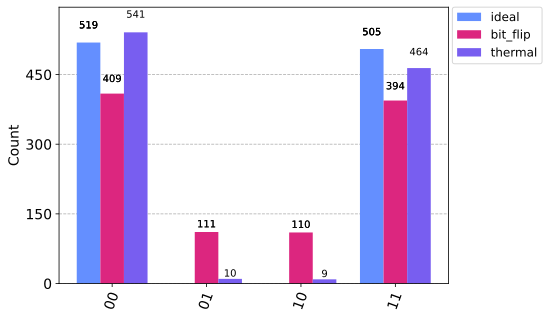

In [ ]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_thermal.basis_gates,
              noise_model=noise_thermal)
result_thermal = job.result()
counts_thermal = result_thermal.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip,counts_thermal], legend = ["ideal","bit_flip","thermal"])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>
    
This code is an example of how to simulate a noisy quantum circuit using Qiskit. The code first generates T1 and T2 values for each qubit in the circuit from a normal distribution with a mean of 50 microseconds and a standard deviation of 10 microseconds. T1 and T2 represent the decoherence times for a qubit's relaxation and dephasing processes, respectively.

The T2 values are truncated to be no greater than twice the T1 value, as this is a physical constraint on the coherence times of a qubit.

Next, the code defines the instruction times for various quantum gates, including U1, U2, U3, CX, reset, and measure gates, and creates QuantumError objects that model thermal relaxation errors for each of these gates using the T1 and T2 values generated previously.

The code then adds these errors to a noise model, which is used to simulate the noisy quantum circuit using the execute function in Qiskit. The resulting noisy output is plotted alongside the ideal and bit-flip error corrected outputs for comparison.

Overall, this code provides an example of how to incorporate realistic noise models into quantum circuit simulations using Qiskit.
    
</div>

**Exercise 1: (extra credits)**

Convert this notebook to quiskit version 1.3.2